#Data Exploration



In [101]:
# All libraries in this file
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score


In [102]:
data = pd.read_csv('/content/Titanic_train.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [103]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [104]:
data.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [105]:
negative_cols = [col for col in data.columns if data[col].dtype != object and data[col].lt(0).any()]
# Filter out columns with object dtype before comparison
if negative_cols:
    print("Columns with negative values:", negative_cols)
else:
    print("No negative values found in any columns.")

No negative values found in any columns.


In [106]:
# handling missing values and
data['Age'].fillna(data['Age'].mean(), inplace=True)
data.dropna(subset=['Embarked'], inplace=True)

<ipython-input-106-ea1eba43dab9>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Age'].fillna(data['Age'].mean(), inplace=True)


In [107]:
# removing Cabin, Ticket and Name columns
data.drop(['PassengerId','Name','Ticket','Cabin'], axis=1, inplace=True)

In [108]:
data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000
mean,0.382452,2.311586,29.653446,0.524184,0.382452,32.096681
std,0.486260,0.834700,12.968366,1.103705,0.806761,49.697504
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.895800
50%,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### Outlier detection and treatment

<Axes: >

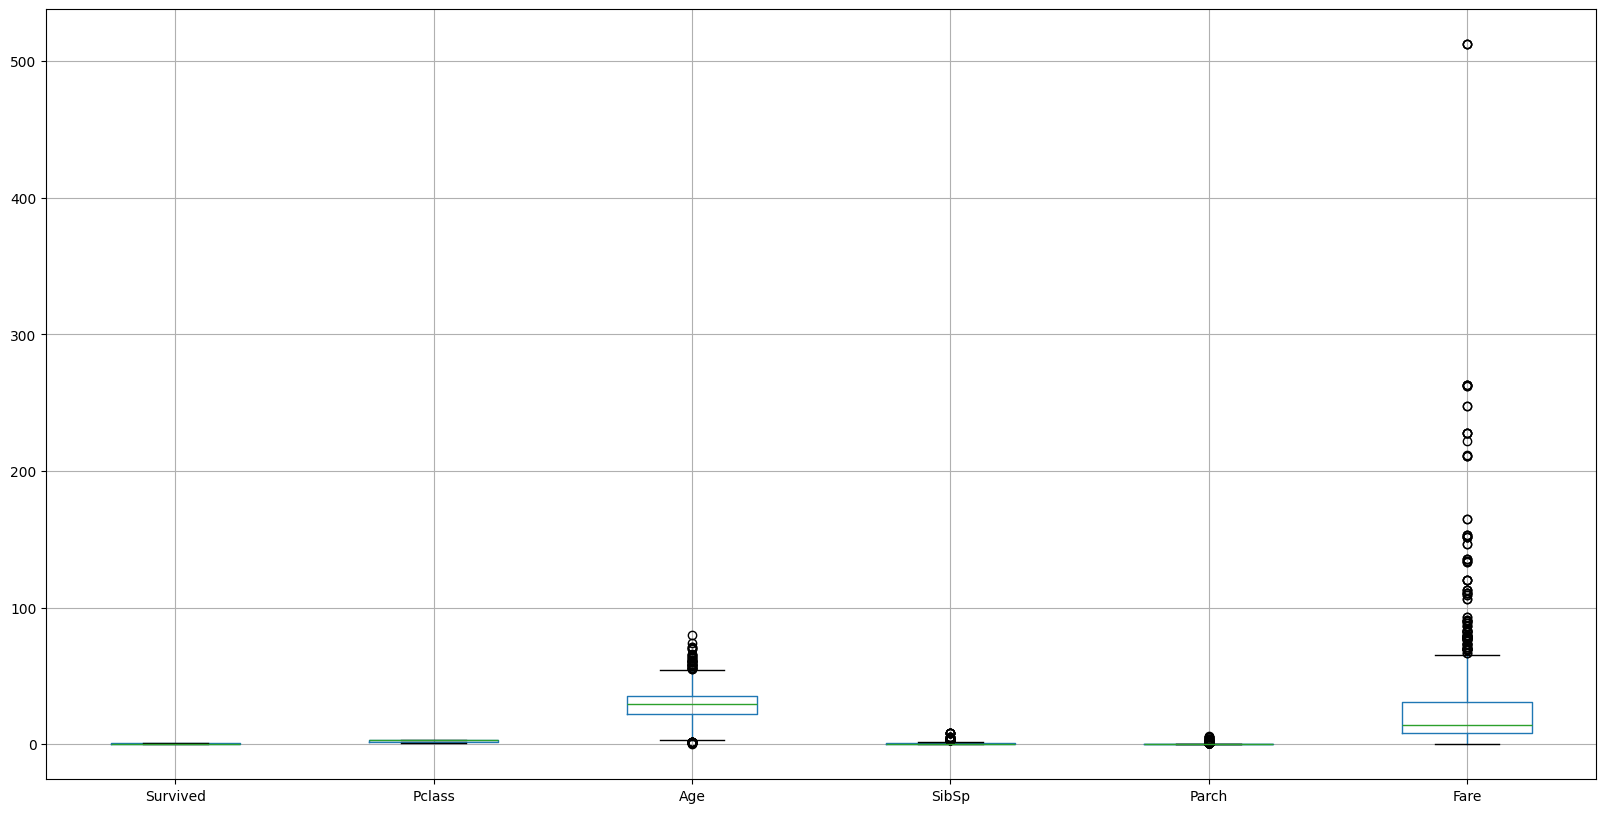

In [109]:
data.boxplot(figsize=(20,10))

In [110]:
# Outlier Detection: User defined Function to calculate Upper Extreme and Lower Extreme value
def outlier_detection(data,colname):
  q1 = data[colname].quantile(0.25)
  q3 = data[colname].quantile(0.75)
  iqr = q3 - q1

  upper_extreme = q3 + (1.5 * iqr)
  lower_extreme = q1 - (1.5 * iqr)

  return lower_extreme, upper_extreme

In [111]:
for colname in ['Age', 'SibSp', 'Parch', 'Fare']:
  lower_extreme, upper_extreme = outlier_detection(data,colname)
  #replace all outliers with lower/upper extreme
  data.loc[data[colname] > upper_extreme, colname] = round(upper_extreme)
  data.loc[data[colname] < lower_extreme, colname] = round(lower_extreme)

<ipython-input-112-f77d380abd75>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x='Pclass', palette='colorblind')
<ipython-input-112-f77d380abd75>:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x='Embarked', palette='colorblind')
<ipython-input-112-f77d380abd75>:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Pclass', y='Fare', data=data, palette='colorblind')


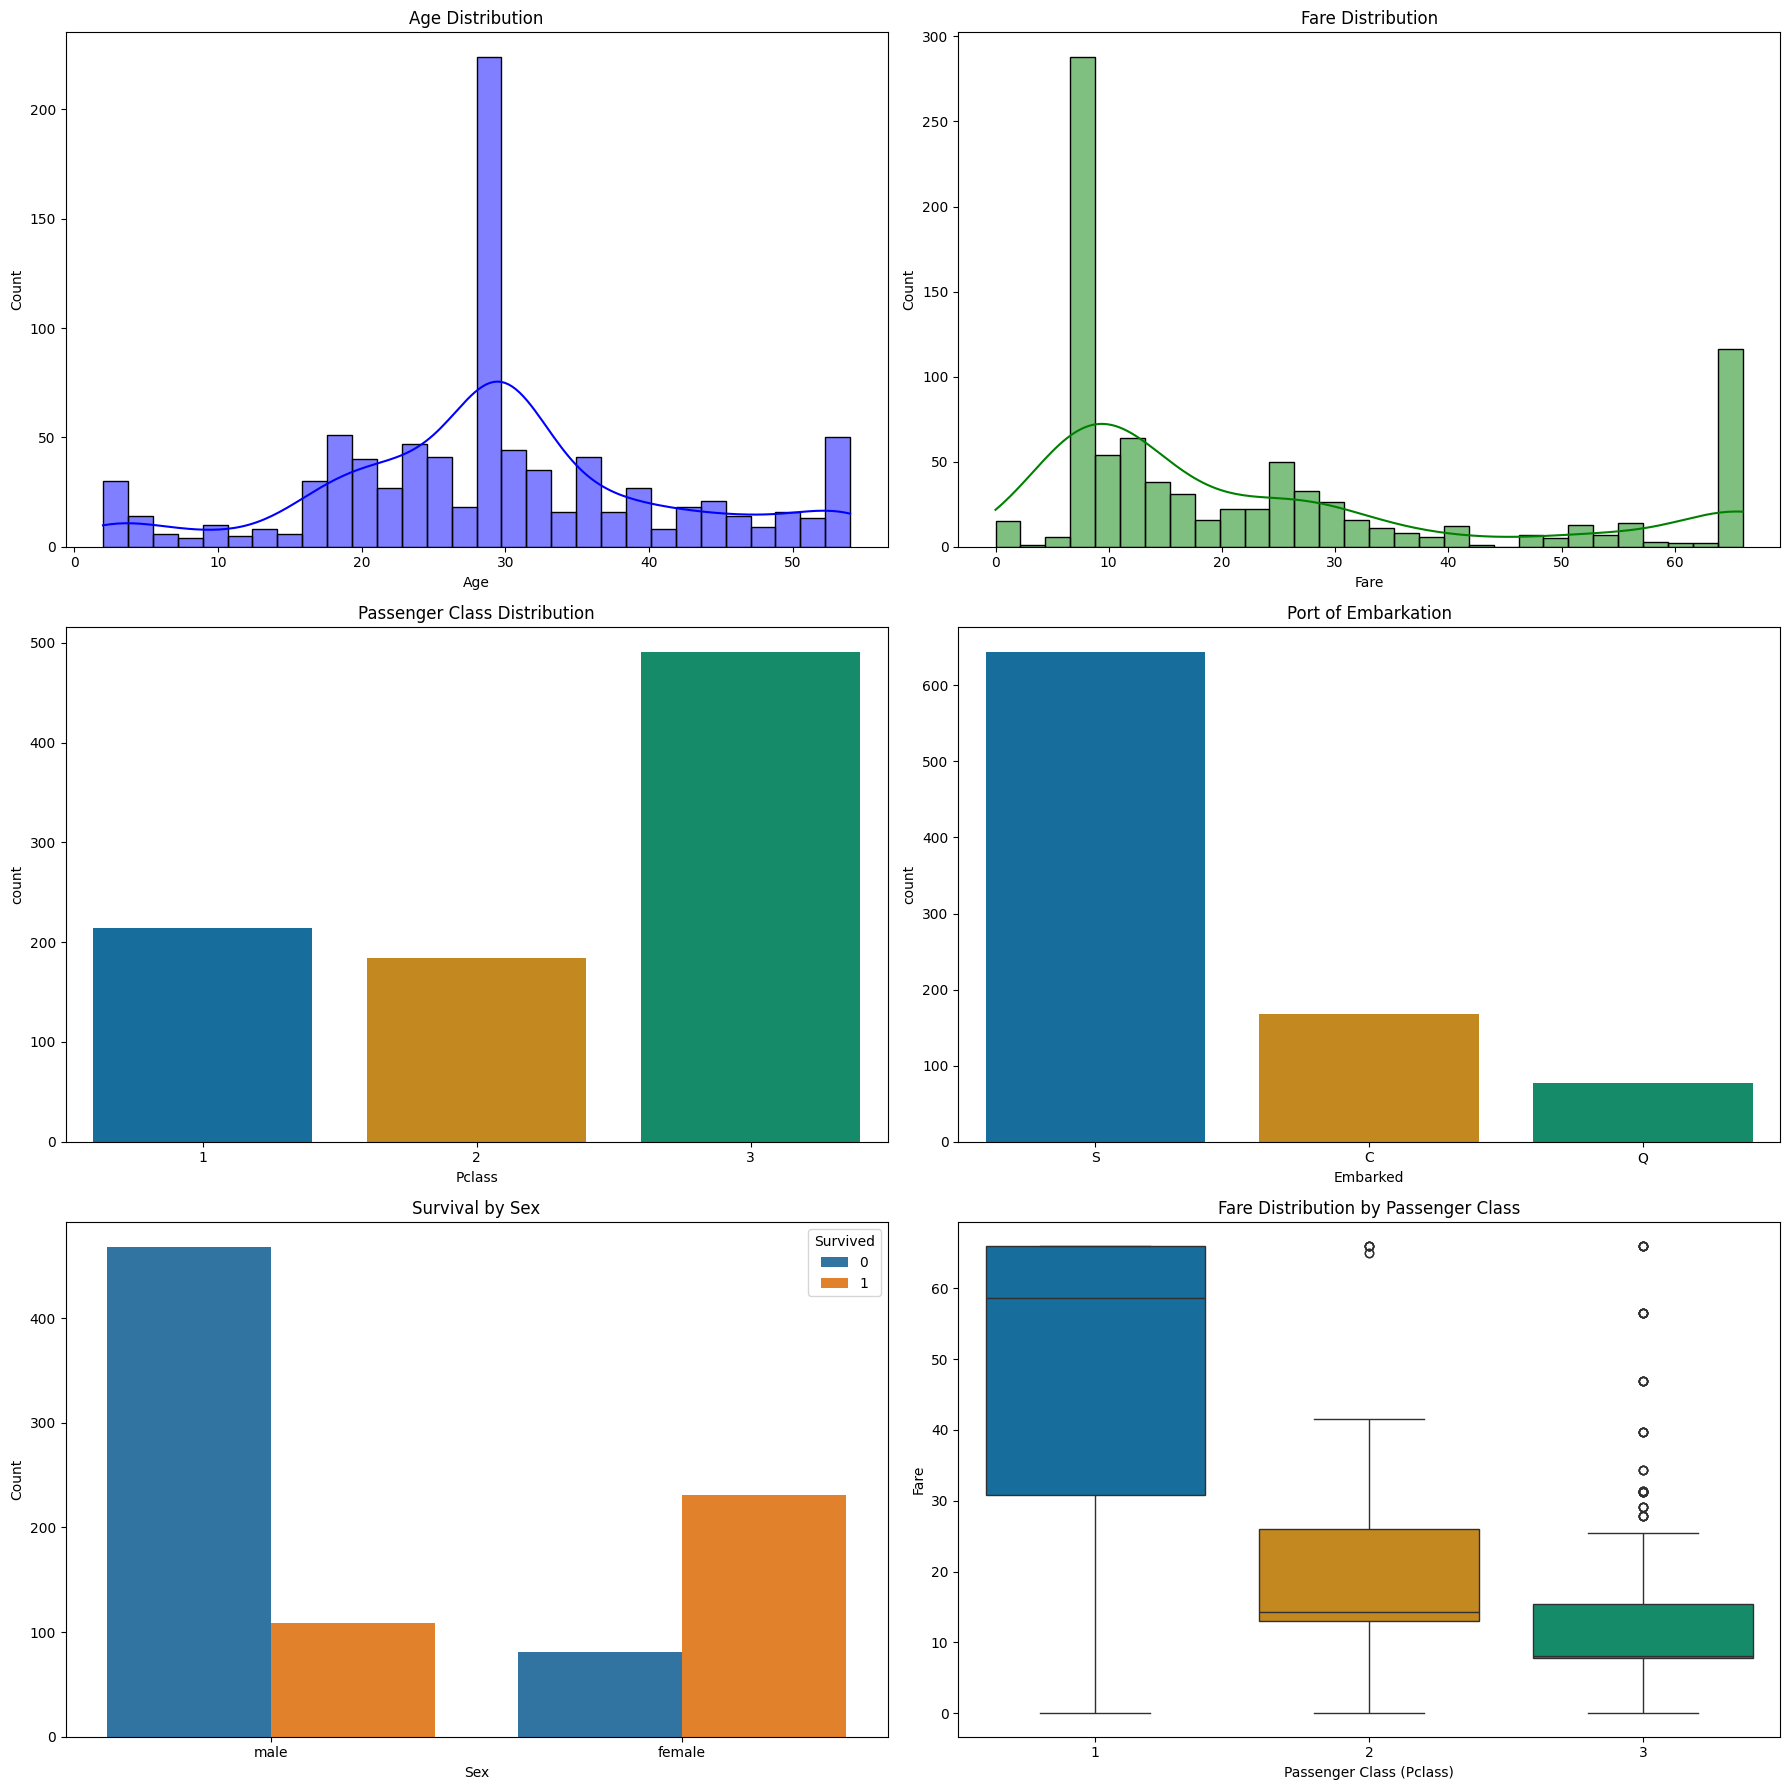

In [112]:
plt.figure(figsize=(18, 18))

# Histogram for Age
plt.subplot(3, 2, 1)
sns.histplot(data['Age'], bins=30, kde=True, color='blue')
plt.title('Age Distribution')
plt.xlabel('Age')

# Histogram for Fare
plt.subplot(3, 2, 2)
sns.histplot(data['Fare'], bins=30, kde=True, color='green')
plt.title('Fare Distribution')
plt.xlabel('Fare')

# Count plot for Pclass
plt.subplot(3, 2, 3)
sns.countplot(data=data, x='Pclass', palette='colorblind')
plt.title('Passenger Class Distribution')
plt.xlabel('Pclass')

# Count plot for Embarked
plt.subplot(3, 2, 4)
sns.countplot(data=data, x='Embarked', palette='colorblind')
plt.title('Port of Embarkation')
plt.xlabel('Embarked')

# Survival by Sex
plt.subplot(3, 2, 5)
sns.countplot(data=data, x='Sex', hue='Survived')
plt.title('Survival by Sex')
plt.xlabel('Sex')
plt.ylabel('Count')

# Box plot of Pclass and Fare
plt.subplot(3, 2, 6)
sns.boxplot(x='Pclass', y='Fare', data=data, palette='colorblind')
plt.title('Fare Distribution by Passenger Class')
plt.xlabel('Passenger Class (Pclass)')
plt.ylabel('Fare')

plt.tight_layout()
plt.show()

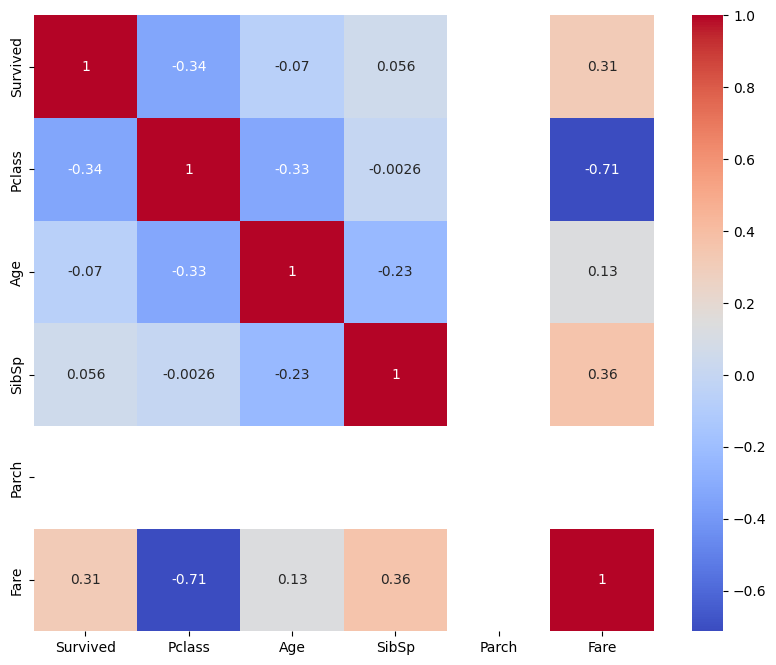

In [113]:
plt.figure(figsize=(10,8))
sns.heatmap(data.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.show()

## Patterns
* Majority of passengers are between 20-40 years old.
* Fare distribution is right-skewed, but many values are on the upper extreme after outlier treatment
* Most passengers are in the 3rd class.
* 'S' is the most common embarkation port.

### Encode categorical variables.

In [114]:
data = pd.get_dummies(data, columns=['Sex', 'Embarked'])

In [115]:
data.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.250,False,True,False,False,True
1,1,1,38.0,1,0,66.000,True,False,True,False,False
2,1,3,26.0,0,0,7.925,True,False,False,False,True
3,1,1,35.0,1,0,53.100,True,False,False,False,True
4,0,3,35.0,0,0,8.050,False,True,False,False,True


In [116]:
x = data.drop(columns=['Survived'])
y = data['Survived']

# Initialize the Logistic Regression model i.e. called instance creation of class object.
model = LogisticRegression()

# Train the model
model.fit(x, y)

LogisticRegression()

In [117]:
# Import clean encode TEST DATA
test_data = pd.read_csv('/content/Titanic_test.csv')
test_data = pd.get_dummies(test_data, columns=['Sex', 'Embarked'])
test_data.drop(['PassengerId','Name','Ticket','Cabin'], axis=1, inplace=True)
test_data['Age'].fillna(data['Age'].mean(), inplace=True)
test_data['Fare'].fillna(data['Fare'].median(), inplace=True)
test_data.head()

<ipython-input-117-532df30f5f09>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test_data['Age'].fillna(data['Age'].mean(), inplace=True)
<ipython-input-117-532df30f5f09>:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,34.5,0,0,7.8292,False,True,False,True,False
1,3,47.0,1,0,7.0000,True,False,False,False,True
2,2,62.0,0,0,9.6875,False,True,False,True,False
3,3,27.0,0,0,8.6625,False,True,False,False,True
4,3,22.0,1,1,12.2875,True,False,False,False,True


In [118]:
y_test_pred  = model.predict(test_data)
y_test_pred

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

## Since we do not have actual 'Survived' in test data we use training data for model evaulation

In [119]:
y_pred_df= pd.DataFrame({'actual': y,
                         'predicted_prob': model.predict(x)})
y_pred_df.head(14)

,actual,predicted_prob
0,0,0
1,1,1
2,1,1
3,1,1
4,0,0
5,0,0
6,0,0
7,0,0
8,1,1
9,1,1


In [120]:
y_pred = model.predict(x)

In [121]:
# Confusion Matrix for the model accuracy  TP   FP
#                                          FN   TN
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y,y_pred)
print (confusion_matrix)

[[472  77]
 [102 238]]


## Accuracy = ((TP + TN)/(TP + FP + FN + TN)) * 100

In [122]:
#Accuracy
((467 + 229)/(467 + 82 + 111 + 229))*100

78.29021372328458

In [123]:
TP = 467
FP = 82
FN = 111
TN = 229
recall = TP/(TP + FN)
print("Recall:", recall)
precision = TP/(TP + FP)
print("Precision:", precision)

Recall: 0.8079584775086506
Precision: 0.8506375227686703


In [124]:
F_Score = 2 * ((precision * recall)/(precision + recall))
print("F-Score:", F_Score)

F-Score: 0.828748890860692


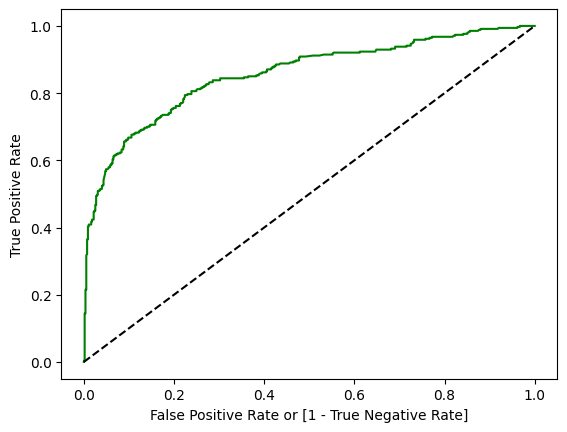

In [125]:
from sklearn.metrics import roc_curve #roc-receiver operating characteristic
from sklearn.metrics import roc_auc_score # auc-area under curve

fpr, tpr, thresholds = roc_curve(y, model.predict_proba(x)[:,1])
auc = roc_auc_score(y, y_pred)# compute roc_auc_score based on y and y predicted

plt.plot(fpr, tpr, color='Green')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')
plt.show()

In [126]:
print(f'AUC: {auc}')

AUC: 0.7798724954462659


In [127]:
# Retrieve coefficients and feature names
feature_names = x.columns
coefficients = model.coef_[0]

# Combine into a DataFrame for easier interpretation
coef_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})
coef_df = coef_df.sort_values(by='Coefficient', ascending=False)
print(coef_df)

      Feature  Coefficient
5  Sex_female     1.298805
8  Embarked_Q     0.150120
7  Embarked_C     0.148048
4        Fare     0.005698
3       Parch     0.000000
1         Age    -0.039366
9  Embarked_S    -0.296189
2       SibSp    -0.360657
0      Pclass    -1.056530
6    Sex_male    -1.296826


# Significane of Features
1. Gender (Sex_female and Sex_male): Highly significant. Female passengers often had higher survival rates compared to males.
2. Passenger Class (Pclass): It has a negative coefficient, means reduced survival odds for 1st and 2nd class.
3. Age: Age has near normal distribution.
4. Fare: Higher fares correlate sigthly with better survival odds, reflecting access to better accommodations.
5. Embarked: Passengers embarked on Cherbourg(C) have more survival rate.
6. Family Size (SibSp and Parch): number of parents / children aboard the Titanic(Parch) has no impact. Whereas number of siblings / spouses aboard the Titanic(SibSp) has a negative correlation with survival rate.

In [128]:
import joblib
joblib.dump(model, 'titanic_model.pkl')

['titanic_model.pkl']